In [1]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import earthpy as et
import earthpy.clip as cl

# Get week 4 data!
et.data.get_data("spatial-vector-lidar")
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))


## Review -- Context Managers
Following this lesson: https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/open-lidar-raster-python/

In [2]:
# Define relative path to file
lidar_dem_path = os.path.join("data", "colorado-flood", "spatial", 
                              "boulder-leehill-rd", "pre-flood", "lidar",
                              "pre_DTM.tif")
# Open raster data
lidar_dem = rio.open(lidar_dem_path)
lidar_dem, type(lidar_dem)

(<open DatasetReader name='data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif' mode='r'>,
 rasterio.io.DatasetReader)

In [3]:
# close it
lidar_dem.close()

In [4]:
with rio.open(lidar_dem_path) as src_lidar_dem:
    src_lidar_dem.read()
    print("INSIDE context manager it's OPEN", src_lidar_dem)

# Notice it's closed here
print("OUTSIDE of the context manager", src_lidar_dem)

INSIDE context manager it's OPEN <open DatasetReader name='data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif' mode='r'>
OUTSIDE of the context manager <closed DatasetReader name='data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif' mode='r'>


There are different ways to import Python modules and then associated functions.

This example imports the entire clip module and allows you to call any function within
that module using `cl.function_here`

`import earthpy.clip as cl`

Alternatively you could import a single function if that is all you want to use.

`from earthpy.clip import clip_shp`

Either approach is ok. Some people prefer to keep the code cleaner by importing 
the specific functions that they want in a particular module. Others prefer 
the expressiveness of specifying what module (and package) the function comes from.

The choice is yours as to what you use!! 

In [5]:
# Get help -- just a reminder to check the expected parameter input types. 
help(cl.clip_shp)

Help on function clip_shp in module earthpy.clip:

clip_shp(shp, clip_obj)
    Clip points, lines, or polygon geometries to the clip_obj extent.
    
    Both layers must be in the same Coordinate Reference System (CRS) and will
    be clipped to the full extent of the clip object.
    
    If there are multiple polygons in clip_obj,
    data from shp will be clipped to the total boundary of
    all polygons in clip_obj.
    
    Parameters
    ----------
    shp : GeoDataFrame
          Vector layer (point, line, polygon) to be clipped to clip_obj.
    clip_obj : GeoDataFrame
          Polygon vector layer used to clip shp.
          The clip_obj's geometry is dissolved into one geometric feature
          and intersected with shp.
    
    Returns
    -------
    GeoDataFrame
         Vector data (points, lines, polygons) from shp clipped to
         polygon boundary from clip_obj.
    
    Examples
    --------
    Clipping points (glacier locations in the state of Colorado) with
  

## Open a shapefile Using Geopandas
Remember that we are working with VECTOR data this week which is different than raster data in it's structure. 
We will use GeoPandas for vector data. Geopandas data structures are very similar to pandas! they have additional spatial attributes associated with them. 


In [6]:
base_data_path = os.path.join("data","spatial-vector-lidar")
cali_data_path = os.path.join(base_data_path,"california")

plot_centroid_path = os.path.join(cali_data_path,
             "neon-sjer-site","vector_data","SJER_plot_centroids.shp")

# Open a shapefile using geopandas
sjer_plot_locations = gpd.read_file(plot_centroid_path)

# View data attributes
sjer_plot_locations.head()

,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)
2,SJER116,center,4110819.876,256838.760,grass,POINT (256838.760 4110819.876)
3,SJER117,center,4108752.026,256176.947,trees,POINT (256176.947 4108752.026)
4,SJER120,center,4110476.079,255968.372,grass,POINT (255968.372 4110476.079)


Explore your data.
You will find many of the same spatial attributes in vector data as you did 
raster data. 

In [7]:
type(sjer_plot_locations)

geopandas.geodataframe.GeoDataFrame

In [8]:
# View the spatial extent of the data
sjer_plot_locations.total_bounds

array([ 254738.618, 4107527.074,  258497.102, 4112167.778])

In [9]:
sjer_plot_locations.crs

{'init': 'epsg:32611'}

In [10]:
# Check to see if your data are points, line or polygons
sjer_plot_locations.geom_type

0     Point
1     Point
2     Point
3     Point
4     Point
5     Point
6     Point
7     Point
8     Point
9     Point
10    Point
11    Point
12    Point
13    Point
14    Point
15    Point
16    Point
17    Point
dtype: object

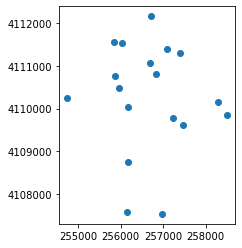

In [11]:
# You can plot directly using the .plot() method
sjer_plot_locations.plot()

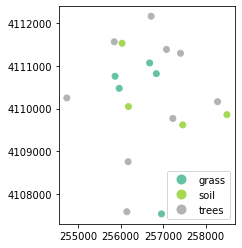

In [12]:
# Plot using Matplotlib
# Note that this works well with one layer
# But for multiple layers if you want a legend, you 
# will want to create a loop to customize colors and labels
fig, ax1 = plt.subplots()
sjer_plot_locations.plot(ax=ax1,
                         column="plot_type",
                         legend=True,
                         cmap="Set2")
plt.show()

In [13]:
# View object shape
sjer_plot_locations.shape

(18, 6)

In [14]:
np.unique(sjer_plot_locations.plot_type)

array(['grass', 'soil', 'trees'], dtype=object)

To plot several layers with custom symbology, you can create a loop.

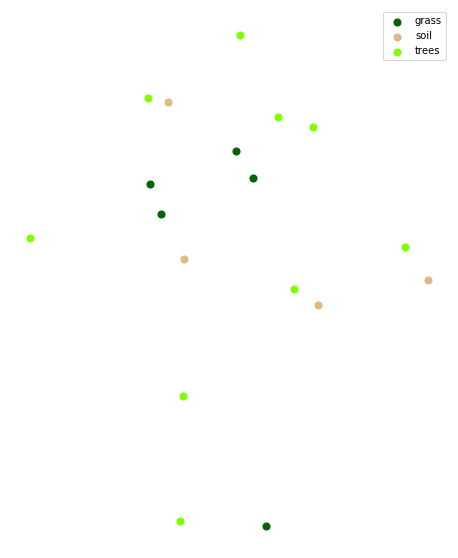

In [15]:
# Create a symbology dictionary that maps "type" to color. In this case the types are trees, grass and soil
points_symb = {'trees': 'chartreuse',
               'grass': 'darkgreen', 
               'soil': 'burlywood'}

# Plot Data
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()

# Add the plot points in sets grouped by plot_type
for ctype, sjer_plot in sjer_plot_locations.groupby('plot_type'):
    color = points_symb[ctype]
    label = ctype
    sjer_plot.plot(color=color, ax=ax, label=label, markersize=50)
    
# For your homework you'll want to add roads to this plot. 
# Be sure the data are in the correct CRS prior to plotting to ensure things line up!
    
# Add a legend
ax.legend()

## Reproject Vector Data in Python

Next let's have a look at the roads data. remember that you are creating a map of roads and points together. 

In [16]:
# Import the data
sjer_roads_path = os.path.join(cali_data_path,"madera-county-roads","tl_2013_06039_roads.shp")
sjer_roads = gpd.read_file(sjer_roads_path)

sjer_aoi_path = os.path.join(cali_data_path, "neon-sjer-site", "vector_data","SJER_crop.shp")
sjer_aoi = gpd.read_file(sjer_aoi_path)

# Are the crs' the same for the two datasets?
sjer_aoi.crs, sjer_roads.crs

({'init': 'epsg:32611'}, {'init': 'epsg:4269'})

In [17]:
# Formally that they are the same (or not)
try:
    assert sjer_aoi.crs == sjer_roads.crs
    print("The CRS' for both datasets are the same. You can clip the data")
except AssertionError as message:
    print("The CRS' are not the same. Looks like you need to reproject one of the datasets to clip.")

The CRS' are not the same. Looks like you need to reproject one of the datasets to clip.


 Notice that if you attempt to plot two datasets that are in different CRS' you will run into issues.
 It technically "works" but the data do not line up properly

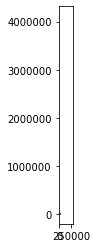

In [18]:
# plot with the data in diff CRS
fig, ax1 = plt.subplots()
sjer_aoi.plot(ax=ax1)
sjer_roads.plot(ax=ax1)
plt.show()

In [19]:
# Reproject the data by typing out the CRS 
sjer_aoi_wgs84 = sjer_aoi.to_crs(epsg=4269)

/Users/leahwasser/miniconda3/envs/earth-analytics-python/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [20]:
# Easier way if you have a layer that you want to match the CRS of 
sjer_aoi_4269 = sjer_aoi.to_crs(sjer_roads.crs)

sjer_aoi_4269.crs, sjer_roads.crs

/Users/leahwasser/miniconda3/envs/earth-analytics-python/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


({'init': 'epsg:4269'}, {'init': 'epsg:4269'})

In [21]:
# Formally that they are the same (or not)
try:
    assert sjer_aoi_4269.crs == sjer_roads.crs
    print("The CRS' for both datasets are the same. You can clip the data")
except AssertionError as message:
    print("The CRS' are not the same. Looks like you need to reproject one of the datasets to clip.")

The CRS' for both datasets are the same. You can clip the data


Now the data line up properly! Now you can clip the data!
A nice way to understand CRS's is to look at the numeric values associated with the x and y locations. you will
then better understand why a plot looks off (like the example above when you tried to plot two datasets in two different CRS'. They are data from the same location but the CRS differences cause issues with processing the data together.

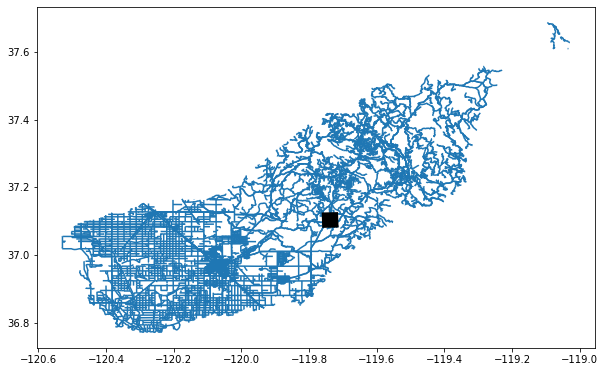

In [22]:
# plot with the data in diff CRS
fig, ax = plt.subplots(figsize=(10, 10))
# zorder to adjust the order 
sjer_roads.plot(ax=ax)
sjer_aoi_4269.plot(ax=ax,
                   color="black",
                   zorder=10)
plt.show()

## Clip Data
Sometimes you will hear clip and sometimes you will here crop. the idea here is similar to what you discovered with the raster data. you can clip the data to the extent of another dataset. This is nice when you want to only work with a smaller amount of data. It can reduce processing time. It also can make a map look nicer if you are focused only on one particular region but have data outside of the region. 

In [23]:
clipped_roads = cl.clip_shp(sjer_roads, sjer_aoi_wgs84)
clipped_roads
clipped_roads = clipped_roads[~clipped_roads.is_empty]

/Users/leahwasser/miniconda3/envs/earth-analytics-python/lib/python3.7/site-packages/geopandas/geoseries.py:330: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


In [24]:
# Import data
country_boundary_us_path = os.path.join(base_data_path,"usa","usa-boundary-dissolved.shp")
country_boundary_us = gpd.read_file(country_boundary_us_path)

state_boundary_us_path = os.path.join(base_data_path, "usa","usa-states-census-2014.shp")
state_boundary_us = gpd.read_file(state_boundary_us_path)

pop_places_path = os.path.join(base_data_path, "global", "ne_110m_populated_places_simple","ne_110m_populated_places_simple.shp")
pop_places = gpd.read_file(pop_places_path)

# Do the data have the same crs?
country_boundary_us.crs, state_boundary_us.crs, pop_places.crs 

({'init': 'epsg:4326'}, {'init': 'epsg:4326'}, {'init': 'epsg:4326'})

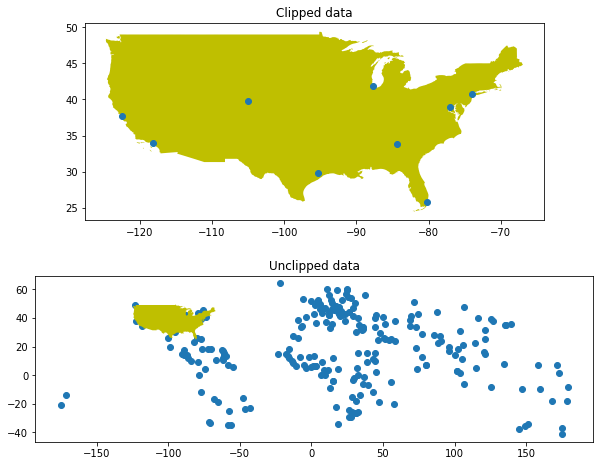

In [25]:
pop_places_clip = cl.clip_shp(pop_places, country_boundary_us)

# Plot the data in 2 frames or axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))
country_boundary_us.plot(ax=ax1,
                         color="y")
pop_places_clip.plot(ax=ax1)
pop_places.plot(ax=ax2)
country_boundary_us.plot(ax=ax2,
                         color="y")
ax1.set_title('Clipped data')
ax2.set_title('Unclipped data')
plt.show()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


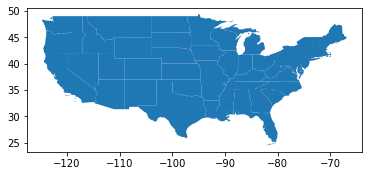

In [26]:
state_boundary_us.plot()
# View dataframe
state_boundary_us.head()

## Dissolve States to Regions! 


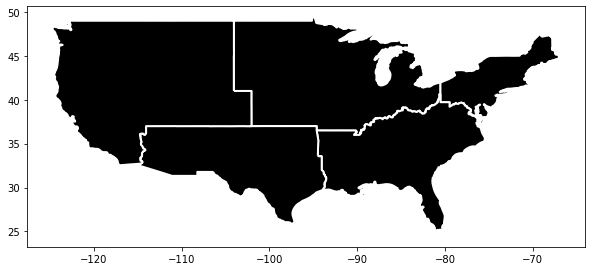

In [27]:
us_regions = state_boundary_us.dissolve(by="region")
us_regions.plot(color="black",
                figsize=(10, 10),
                linewidth=2,
                edgecolor="white")
plt.show()

In [28]:
us_regions.head()

,geometry,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER
region,,,,,,,,,,
Midwest,"MULTIPOLYGON Z (((-87.80048 42.49192 0.00000, ...",17,01779784,0400000US17,17,IL,Illinois,00,143794747023,6200927458
Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0.00000, ...",11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500
Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...",12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551
Southwest,"POLYGON Z ((-94.48587 33.63787 0.00000, -94.41...",48,01779801,0400000US48,48,TX,Texas,00,676601887070,19059877230
West,"MULTIPOLYGON Z (((-104.05325 41.00141 0.00000,...",06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881


In [29]:
## aggregate the data
us_regions = state_boundary_us.dissolve(by="region",
                                       aggfunc=["mean", "sum"])
us_regions.head()

/Users/leahwasser/miniconda3/envs/earth-analytics-python/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,geometry,"(ALAND, mean)","(ALAND, sum)","(AWATER, mean)","(AWATER, sum)"
region,,,,,
Midwest,"MULTIPOLYGON Z (((-87.80048 42.49192 0.00000, ...",1.619891e+11,1943869253244,1.536528e+10,184383393833
Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0.00000, ...",4.138410e+10,869066138232,5.186783e+09,108922434345
Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...",1.137193e+11,1364632039655,8.656388e+09,103876652998
Southwest,"POLYGON Z ((-94.48587 33.63787 0.00000, -94.41...",3.656579e+11,1462631530997,6.054421e+09,24217682268
West,"MULTIPOLYGON Z (((-104.05325 41.00141 0.00000,...",2.702596e+11,2432336444730,6.396450e+09,57568049509


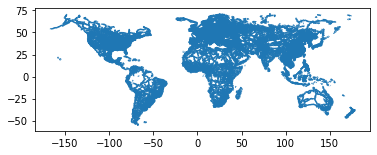

In [30]:
roads_path = "data/spatial-vector-lidar/global/ne_10m_roads/ne_10m_roads.shp"
roads = gpd.read_file(roads_path)
roads.plot()

In [31]:
# this is just a short term fix to ignore warning from geopandas -- 
# if you use it please place it at the top of your notebook. 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)


# Clip the roads layer
country_boundary_us_sim = country_boundary_us.simplify(.2, preserve_topology=True)
roads_cl = cl.clip_shp(roads, country_boundary_us_sim)


In [32]:
# Note that this line fails if you run it
# uncomment it to see 
# roads_cl.plot()

Note that we are improving clip and adding it to geopandas right now. so this is a temporary fix to the problem of having empty geometries in the returned data!

In [33]:
# This is because there are empty geometries in the returned data
roads_cl[roads_cl.is_empty]

,geometry,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,...,add,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label
6,LINESTRING EMPTY,3,Road,Major Highway,MEX,None,"Version 1.5: Changed alignment, a few adds in ...",57D,None,None,...,0,0,0,None,244505,North America,1,Interstate,3.0,6.0
18,LINESTRING EMPTY,7,Road,Secondary Highway,CAN,None,"Version 1.5: Changed alignment, a few adds in ...",3,None,None,...,0,0,0,None,358205,North America,0,Federal,7.0,8.0
19,LINESTRING EMPTY,8,Road,Secondary Highway,CAN,None,"Version 1.5: Changed alignment, a few adds in ...",3,None,None,...,0,0,0,None,354105,North America,0,Federal,7.1,9.0
46,LINESTRING EMPTY,6,Ferry,Ferry Route,USA,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,...,0,0,0,None,99905,North America,0,Other,6.0,8.5
68,LINESTRING EMPTY,6,Road,Secondary Highway,CAN,None,"Version 1.5: Changed alignment, a few adds in ...",3,None,None,...,0,0,0,None,383305,North America,0,State,6.0,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,LINESTRING EMPTY,8,Road,Secondary Highway,MEX,None,New in version 2.0.0,24,None,None,...,0,0,5016,None,47437,North America,0,Federal,7.1,9.6
7899,LINESTRING EMPTY,8,Road,Secondary Highway,MEX,None,New in version 2.0.0,24,None,None,...,0,0,5017,None,47438,North America,0,Federal,7.1,9.6
7900,LINESTRING EMPTY,8,Road,Secondary Highway,MEX,None,New in version 2.0.0,24,None,None,...,0,0,5018,None,47440,North America,0,Federal,7.1,9.6
7901,LINESTRING EMPTY,8,Road,Secondary Highway,MEX,None,New in version 2.0.0,24,None,None,...,0,0,5019,None,47441,North America,0,Federal,7.1,9.6


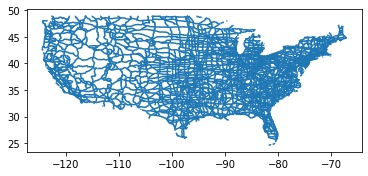

In [34]:
# Remove all of the empty geometries and then plot
roads_cl = roads_cl[~roads_cl.is_empty]

roads_cl.plot()

## use sjoin to join attributes to roads

In [35]:
roads_region = gpd.sjoin(roads_cl,
                        us_regions,
                        how="inner",
                        op="intersects")

/Users/leahwasser/miniconda3/envs/earth-analytics-python/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(None != {'init': 'epsg:4326'})
  "(%s != %s)" % (left_df.crs, right_df.crs)


In [36]:
roads_region.head()


,geometry,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,...,continent,expressway,level,min_zoom,min_label,index_right,"(ALAND, mean)","(ALAND, sum)","(AWATER, mean)","(AWATER, sum)"
0,"LINESTRING Z (-100.50543 42.80753 0.00000, -10...",7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",83,None,None,...,North America,0,Federal,7.0,8.6,Midwest,1.619891e+11,1943869253244,1.536528e+10,184383393833
2,"LINESTRING Z (-87.72757 44.15165 0.00000, -87....",8,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",151,None,None,...,North America,0,Federal,7.1,9.6,Midwest,1.619891e+11,1943869253244,1.536528e+10,184383393833
4,"LINESTRING Z (-104.45097 42.75717 0.00000, -10...",8,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",85,None,None,...,North America,0,Federal,7.1,9.0,Midwest,1.619891e+11,1943869253244,1.536528e+10,184383393833
5,"LINESTRING Z (-104.05329 44.17597 0.00000, -10...",8,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",85,None,None,...,North America,0,Federal,7.1,9.0,Midwest,1.619891e+11,1943869253244,1.536528e+10,184383393833
9,"LINESTRING Z (-101.54391 48.31253 0.00000, -10...",6,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",2,None,None,...,North America,0,Federal,6.0,7.9,Midwest,1.619891e+11,1943869253244,1.536528e+10,184383393833


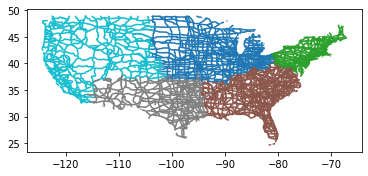

In [37]:
roads_region.plot(column="index_right")